# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy import stats 
from scipy.stats import linregress
from api_keys import weather_api_key

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "London"

# Build query URL
# query_url = url + "appid=" + weather_api_key + "&q=" + city
# query_url

query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=508952728cbc334c66075db41e72ecbf&units=imperial&q='

In [13]:
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 122.2111, 'lat': -8.6199},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 81.12,
  'feels_like': 85.55,
  'temp_min': 81.12,
  'temp_max': 81.12,
  'pressure': 1008,
  'humidity': 82,
  'sea_level': 1008,
  'grnd_level': 1006},
 'visibility': 10000,
 'wind': {'speed': 10.6, 'deg': 299},
 'clouds': {'all': 100},
 'dt': 1612579938,
 'sys': {'country': 'ID', 'sunrise': 1612561920, 'sunset': 1612606708},
 'timezone': 28800,
 'id': 1635815,
 'name': 'Maumere',
 'cod': 200}

In [16]:
# Set empty lists to hold city and stats 
city_loop = []
Lats = []
Lons = []
Max_Temps = []
Humidities = []
Clouds = []
Dates = []
Wind_speeds = []
Countries = []

# Loop through each city
for city in cities:
    
    
    # Try to grab needed variables 
    try:
        weather_json = requests.get(query_url + city).json()
        Lats.append(weather_json['coord']['lat'])
        Lons.append(weather_json['coord']['lon'])
        Max_Temps.append(weather_json['main']['temp_max'])
        Humidities.append(weather_json['main']['humidity'])
        Clouds.append(weather_json['clouds']['all'])
        Dates.append(weather_json['dt'])
        Wind_speeds.append(weather_json['wind']['speed'])
        Countries.append(weather_json['sys']['country'])
        city_loop.append(city)
        print(f"Processing Record | {city}")

    # Handle exceptions for a character that is not available in the city list
    except:
        # Append null values
        print("City not found. Skipping...")
        pass

Processing Record | hamilton
Processing Record | butaritari
Processing Record | mugur-aksy
Processing Record | dorado
Processing Record | ushuaia
Processing Record | albany
Processing Record | katobu
Processing Record | san cristobal
Processing Record | mar del plata
Processing Record | ballia
City not found. Skipping...
Processing Record | aleksandrov gay
Processing Record | eyl
Processing Record | port elizabeth
Processing Record | avarua
Processing Record | hobart
Processing Record | saint george
Processing Record | tuktoyaktuk
Processing Record | roald
Processing Record | susanville
Processing Record | weligama
Processing Record | mataura
Processing Record | mabopane
Processing Record | mount isa
Processing Record | rikitea
Processing Record | cape town
Processing Record | moramanga
Processing Record | kruisfontein
Processing Record | punta arenas
Processing Record | hasaki
Processing Record | yellowknife
Processing Record | atuona
Processing Record | thompson
Processing Record | b

Processing Record | bonthe
Processing Record | tiarei
Processing Record | leningradskiy
City not found. Skipping...
Processing Record | vanimo
Processing Record | cayenne
Processing Record | inverness
Processing Record | kupang
Processing Record | vestmannaeyjar
Processing Record | chaplynka
Processing Record | whitehorse
Processing Record | campos gerais
Processing Record | kottagudem
Processing Record | komsomolskiy
Processing Record | santa maria da vitoria
Processing Record | coruripe
Processing Record | dolores
Processing Record | qurayyat
Processing Record | nuuk
Processing Record | aksu
Processing Record | emilio carranza
Processing Record | chunskiy
Processing Record | erenhot
Processing Record | ambulu
Processing Record | werda
City not found. Skipping...
Processing Record | antigonish
Processing Record | carolina
Processing Record | bireun
Processing Record | turayf
Processing Record | kungsbacka
Processing Record | san ramon
Processing Record | kachiry
Processing Record | ma

Processing Record | cabra
Processing Record | roma
Processing Record | manchester
Processing Record | lunino
Processing Record | dongsheng
Processing Record | vieques
Processing Record | kavaratti
Processing Record | khalkhal
Processing Record | la cruz
City not found. Skipping...
Processing Record | ramsar
Processing Record | baherden
Processing Record | radzyn podlaski
Processing Record | marzuq
Processing Record | soyo
Processing Record | rafai
Processing Record | znamenskoye
Processing Record | anadyr
Processing Record | awbari
Processing Record | lazo
Processing Record | ornskoldsvik
City not found. Skipping...
Processing Record | scarborough
Processing Record | bolobo
Processing Record | avera
Processing Record | flekkefjord
Processing Record | loandjili
Processing Record | majene
Processing Record | kirkland lake
Processing Record | bairiki
Processing Record | abu samrah
Processing Record | koindu
Processing Record | warsaw
Processing Record | voskresenskoye
Processing Record | 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#example

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
#create table
city_summary = {"City":city_loop, "Lat":Lats, "Lng": Lons, "Max Temp":Max_Temps, "Humidity": Humidities, "Cloudiness": Clouds, "Wind Speed": Wind_speeds, "Country": Countries, "Date": Dates}
city_summary_df = pd.DataFrame(city_summary)
city_summary_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,34.00,55,20,9.22,US,1612580250
1,butaritari,3.0707,172.7902,81.18,81,20,18.45,KI,1612580250
2,mugur-aksy,50.3500,90.5000,11.71,88,99,3.94,RU,1612580250
3,dorado,18.4588,-66.2677,73.99,87,40,1.01,PR,1612580045
4,ushuaia,-54.8000,-68.3000,46.40,76,40,27.63,AR,1612579975
...,...,...,...,...,...,...,...,...,...
557,leshukonskoye,64.8989,45.7622,-8.70,88,98,11.05,RU,1612580282
558,rioja,-29.4111,-66.8507,74.88,48,0,0.51,AR,1612580282
559,tilichiki,60.4667,166.1000,9.10,96,100,9.37,RU,1612580282
560,nowy dwor gdanski,54.2131,19.1177,24.80,93,75,8.05,PL,1612580282


In [63]:
#example

In [64]:
city_stats_df= city_summary_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]].agg(['count','mean', 'std', 'min',  'max'])
city_stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.661571,17.218315,49.187242,75.227758,57.115658,7.893310,1.612580e+09
std,33.456381,88.847309,31.461098,19.422998,40.055654,5.638029,7.521809e+01
min,-54.800000,-175.200000,-39.350000,1.000000,0.000000,0.160000,1.612580e+09
max,78.218600,179.316700,91.620000,100.000000,100.000000,33.550000,1.612580e+09


In [65]:
#example

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [66]:
#can skip as no humidity is over 100

In [67]:
#  Get the indices of cities that have humidity over 100%.


In [68]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

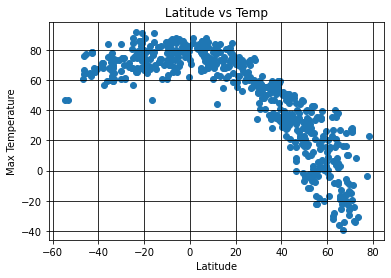

In [69]:
plt.scatter(city_summary_df["Lat"], city_summary_df ["Max Temp"])
plt.title("Latitude vs Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.show()

## Latitude vs. Humidity Plot

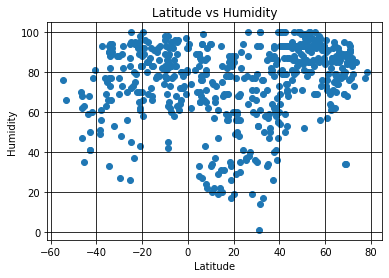

In [71]:
plt.scatter(city_summary_df["Lat"], city_summary_df ["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.show()

## Latitude vs. Cloudiness Plot

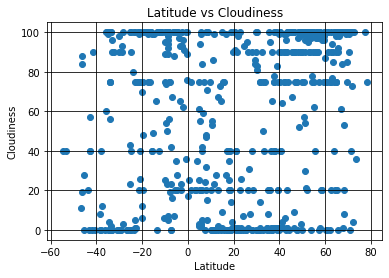

In [73]:
plt.scatter(city_summary_df["Lat"], city_summary_df ["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.show()

## Latitude vs. Wind Speed Plot

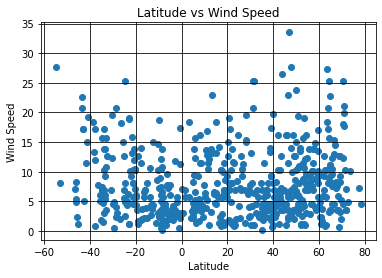

In [75]:
plt.scatter(city_summary_df["Lat"], city_summary_df ["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.show()

In [101]:
#need new df with just latitude 0-90 to tell me northern hemisphere 
hem_city_df = city_summary_df[["Lat","Max Temp", "Cloudiness", "Wind Speed", "Humidity"]]
hem_city_df
northern_df = hem_city_df[hem_city_df['Lat']> 0]
#northern_df

southern_df = hem_city_df[hem_city_df['Lat']< 0]
#southern_df

,Lat,Max Temp,Cloudiness,Wind Speed,Humidity
4,-54.8000,46.40,40,27.63,76
6,-4.9408,86.83,28,7.74,63
8,-38.0023,71.01,0,11.99,61
12,-33.9180,69.80,75,6.91,94
13,-21.2078,86.00,75,10.36,70
...,...,...,...,...,...
539,-3.5403,85.69,65,4.16,64
551,-43.5333,64.40,20,20.71,59
555,-8.6136,71.91,96,3.74,85
558,-29.4111,74.88,0,0.51,48


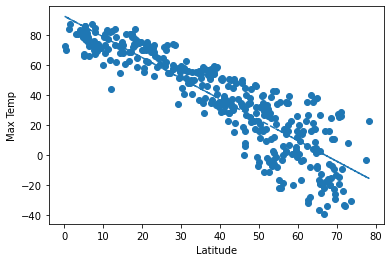

The correlation between both factors is -0.89
The correlation between weight and tumor value is -0.89


In [121]:
North_Lat = northern_df.iloc[:,0]
North_Temp = northern_df.iloc[:,1]

# # # Perform a linear regression on volume versus weight
slope, int, r, p, std_err = st.linregress(North_Lat, North_Temp)

      
fit = slope * North_Lat + int

# # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# ## Plot the linear model on top of scatter plot 
plt.scatter(North_Lat,North_Temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(North_Lat,fit,"--")
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")
#plt.xticks(North_Lat, rotation=90)
# plt.savefig(need to add path!!) 
plt.show()

correlation = round(st.pearsonr(North_Temp,North_Lat)[0],2)
print(f"The correlation between both factors is {correlation}")
 

# # #Caculate
corr = round(st.pearsonr(North_Temp,North_Lat)[0],2)
print(f'The correlation between weight and tumor value is {corr}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


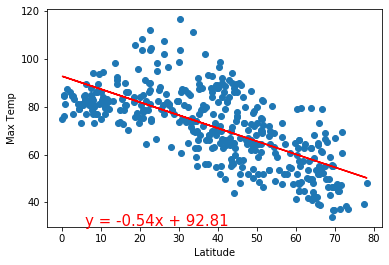

In [25]:
#example

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


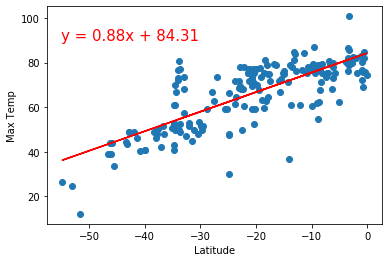

In [26]:
#example

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


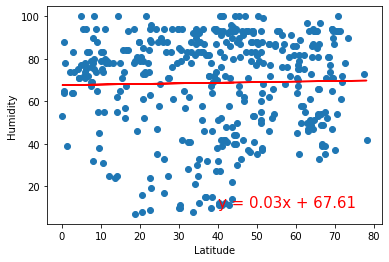

In [27]:
#example

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


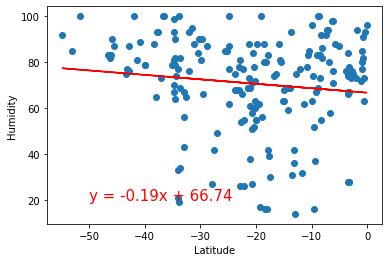

In [28]:
#example

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


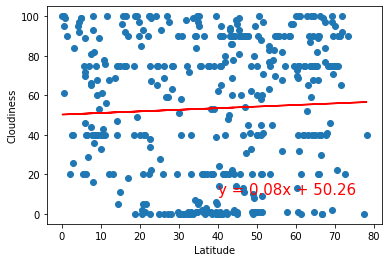

In [29]:
#example

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


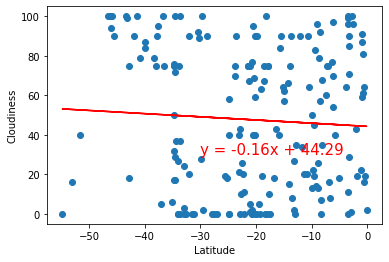

In [30]:
#example

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


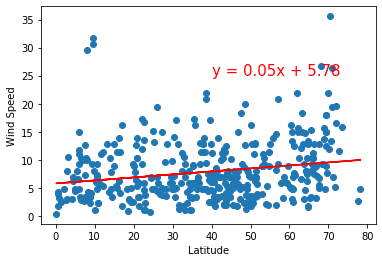

In [31]:
#example

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


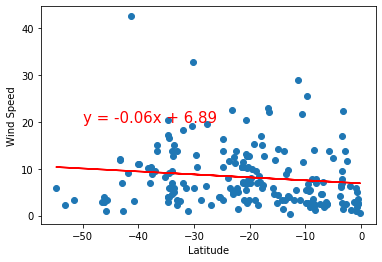

In [32]:
#example